# YouTube Spam Collection v. 1

## Grupo 2
Alberto Atilio Sbrana Junior
<br>
Luiz Barreto Pedro de Alcântara
<br>
Priscila Portela Costa

# Problema

Trata-se de um problema de classificação binária sobre comentários de vídeos no Youtube.
<br>
Há no total 5 arquivos, separados por artista:
- Psy
- Katy Perry
- LMFAO
- Eminem
- Shakira

# Bibliotecas

In [37]:
import pandas as pd
import numpy as np

import svmutil
from svmutil import svm_read_problem
from svmutil import svm_problem
from svmutil import svm_parameter
from svmutil import svm_train
from svmutil import svm_predict
from svmutil import svm_save_model
import matplotlib.pyplot as plt #visualização
from ML_library import *

# Modelo 5: Support Vector Machines

## Carregando os _datasets_

In [38]:
#occurency
X_occur_train = pd.read_csv('X_occurrency_train.csv', header=None)
X_occur_test = pd.read_csv('X_occurrency_test.csv', header=None)
X_occur_val = pd.read_csv('X_occurrency_validation.csv', header=None)

Y_occur_train = pd.read_csv('Y_occurrency_train.csv', header=None)
Y_occur_test = pd.read_csv('Y_occurrency_test.csv', header=None)
Y_occur_val = pd.read_csv('Y_occurrency_validation.csv', header=None)

#frequency
X_frequ_train = pd.read_csv('X_frequency_train.csv', header=None)
X_frequ_test = pd.read_csv('X_frequency_test.csv', header=None)
X_frequ_val = pd.read_csv('X_frequency_validation.csv', header=None)

Y_frequ_train = pd.read_csv('Y_frequency_train.csv', header=None)
Y_frequ_test = pd.read_csv('Y_frequency_test.csv', header=None)
Y_frequ_val = pd.read_csv('Y_frequency_validation.csv', header=None)

#tf_idf
X_tfidf_train = pd.read_csv('X_tfidf_train.csv', header=None)
X_tfidf_test = pd.read_csv('X_tfidf_test.csv', header=None)
X_tfidf_val = pd.read_csv('X_tfidf_validation.csv', header=None)

Y_tfidf_train = pd.read_csv('Y_tfidf_train.csv', header=None)
Y_tfidf_test = pd.read_csv('Y_tfidf_test.csv', header=None)
Y_tfidf_val = pd.read_csv('Y_tfidf_validation.csv', header=None)

## Funções auxiliares

In [39]:
def prep_Y(y):
    return np.array(y.values.flatten(), dtype = int)

def min_max_scaler(x, scaler = None):
    if scaler == None:
        x_scaler = [x.min(), x.max()]
        x_scaled = (x - x.min()) / (x.max() - x.min())
        x_scaled.fillna(0, inplace = True)
        return x_scaler, x_scaled
    else:
        x_scaled = (x - scaler[0]) / (scaler[1] - scaler[0]).replace(0, np.inf)
        x_scaled = x_scaled.replace([np.inf, -np.inf], np.nan).fillna(0)
        return x_scaled
    
def gridSearch(X, Y, Xval, Yval):
    
    custo = 1000
    gamma = 1000
    kernel = 2
   
    v = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    f1_max = -1
    for i in v:
        for j in v:
            temp_custo, temp_gamma = i, j
            model = svm_train(Y, X, '-c %f -t %d -g %f -q' %(temp_custo, kernel, temp_gamma))
            classes = svm_predict(Yval, Xval, model, options = '-q')
            cm = get_confusionMatrix(Yval, classes[0], [0,1])
            vp = cm[0,0] # quantidade de verdadeiros positivos
            vn = cm[1,1] # quantidade de verdadeiros negativos
            fp = cm[1,0] # quantidade de falsos positivos
            fn = cm[0,1] # quantidade de falsos negativos
        
            recall = vp/(vp+fn)
            precision = vp/(vp+fp)
    
            f1 = 2 * (precision * recall) / (precision + recall)
               
            if f1 > f1_max:
                custo, gamma, f1_max = temp_custo, temp_gamma, f1

    return custo, gamma

## Occurrency

In [40]:
Y_occur_train = prep_Y(Y_occur_train)
Y_occur_val = prep_Y(Y_occur_val)

In [41]:
#Normalização min-max
X_occur_scaler, X_occur_train_scaled = min_max_scaler(X_occur_train)
X_val_occur_scaled = min_max_scaler(X_occur_val, X_occur_scaler)

X_train_occur_scaled, X_val_occur_scaled = X_occur_train_scaled.values, X_val_occur_scaled.values

In [42]:
bestC, bestGamma = gridSearch(X_train_occur_scaled, Y_occur_train, X_val_occur_scaled, Y_occur_val)
print('Melhores parâmetros\nC: %1.3f, gamma=%1.3f' %(bestC,bestGamma))

Melhores parâmetros
C: 3.000, gamma=0.100


## Frequency 

In [43]:
Y_frequ_train = prep_Y(Y_frequ_train)
Y_frequ_val = prep_Y(Y_frequ_val)

In [44]:
#Normalização min-max
X_frequ_scaler, X_frequ_train_scaled = min_max_scaler(X_frequ_train)
X_val_frequ_scaled = min_max_scaler(X_frequ_val, X_frequ_scaler)
X_train_frequ_scaled, X_val_frequ_scaled = X_frequ_train_scaled.values, X_val_frequ_scaled.values

In [45]:
bestC, bestGamma = gridSearch(X_train_frequ_scaled, Y_frequ_train, X_val_frequ_scaled, Y_frequ_val)
print('Melhores parâmetros\nC: %1.3f, gamma=%1.3f' %(bestC,bestGamma))

Melhores parâmetros
C: 3.000, gamma=0.100


## TF-IDF

In [46]:
Y_tfidf_train = prep_Y(Y_tfidf_train)
Y_tfidf_val = prep_Y(Y_tfidf_val)

In [47]:
#Normalização min-max
X_tfidf_scaler, X_tfidf_train_scaled = min_max_scaler(X_tfidf_train)
X_val_tfidf_scaled = min_max_scaler(X_tfidf_val, X_tfidf_scaler)
X_train_tfidf_scaled, X_val_tfidf_scaled = X_tfidf_train_scaled.values, X_val_tfidf_scaled.values

In [48]:
bestC, bestGamma = gridSearch(X_train_tfidf_scaled, Y_tfidf_train, X_val_tfidf_scaled, Y_tfidf_val)
print('Melhores parâmetros\nC: %1.3f, gamma=%1.3f' %(bestC,bestGamma))

Melhores parâmetros
C: 10.000, gamma=0.300


Dos três tratamentos citados e com uma série de parâmetros que foram testados, os melhores, para cada tipo de preprocessamento:
- Occurrency: C: 3.000, gamma=0.100
- Frequency: C: 3.000, gamma=0.100
- TF_IDF: C: 10.000, gamma=0.300
<br>

Vamos verificar o score F1 para esses três casos.

## Occurency: C=3.000, gamma=0.100

In [49]:
custo = 3
gamma = 0.1
kernel = 2

model = svm_train(Y_occur_train, X_train_occur_scaled, '-c %f -t %d -g %f' %(custo, kernel, gamma))
pred_occur = svm_predict(Y_occur_val, X_val_occur_scaled, model)[0]

cm_occur = get_confusionMatrix(Y_occur_val, pred_occur, [0,1])
print('Matriz de confusão:')
print(cm_occur)

vp=cm_occur[0,0] # quantidade de verdadeiros positivos
vn=cm_occur[1,1] # quantidade de verdadeiros negativos
fp=cm_occur[1,0] # quantidade de falsos positivos
fn=cm_occur[0,1] # quantidade de falsos negativos    
recall = vp/(vp+fn)
precision = vp/(vp+fp)
    
f1 = 2 * (precision * recall) / (precision + recall)

print('Score F1: {}'.format(f1))

Accuracy = 87.2659% (233/267) (classification)
Matriz de confusão:
[[133  16]
 [ 18 100]]
Score F1: 0.8866666666666666


## Frequency: C=3.000, gamma=0.100

In [50]:
custo = 3
gamma = 0.1
kernel = 2

model = svm_train(Y_frequ_train, X_train_frequ_scaled, '-c %f -t %d -g %f' %(custo, kernel, gamma))
pred_frequ = svm_predict(Y_frequ_val, X_val_frequ_scaled, model)[0]

cm_frequ = get_confusionMatrix(Y_frequ_val, pred_frequ, [0,1])
print('Matriz de confusão:')
print(cm_frequ)

vp=cm_frequ[0,0] # quantidade de verdadeiros positivos
vn=cm_frequ[1,1] # quantidade de verdadeiros negativos
fp=cm_frequ[1,0] # quantidade de falsos positivos
fn=cm_frequ[0,1] # quantidade de falsos negativos    
recall = vp/(vp+fn)
precision = vp/(vp+fp)
    
f1 = 2 * (precision * recall) / (precision + recall)

print('Score F1: {}'.format(f1))

Accuracy = 85.0187% (227/267) (classification)
Matriz de confusão:
[[135  14]
 [ 26  92]]
Score F1: 0.8709677419354839


## TF-IDF: C=10.000, gamma=0.300

In [51]:
custo = 10000
gamma = 0.3
kernel = 2

model = svm_train(Y_tfidf_train, X_train_tfidf_scaled, '-c %f -t %d -g %f' %(custo, kernel, gamma))
pred_tfidf = svm_predict(Y_tfidf_val, X_val_tfidf_scaled, model)[0]

cm_tfidf = get_confusionMatrix(Y_tfidf_val, pred_tfidf, [0,1])
print('Matriz de confusão:')
print(cm_tfidf)

vp=cm_tfidf[0,0] # quantidade de verdadeiros positivos
vn=cm_tfidf[1,1] # quantidade de verdadeiros negativos
fp=cm_tfidf[1,0] # quantidade de falsos positivos
fn=cm_tfidf[0,1] # quantidade de falsos negativos    
recall = vp/(vp+fn)
precision = vp/(vp+fp)
    
f1 = 2 * (precision * recall) / (precision + recall)

print('Score F1: {}'.format(f1))

Accuracy = 73.7828% (197/267) (classification)
Matriz de confusão:
[[108  41]
 [ 29  89]]
Score F1: 0.7552447552447552


Para os três casos estudados, o que obteve o maior score foi o dataset com o preprocessamento _Occurrency_

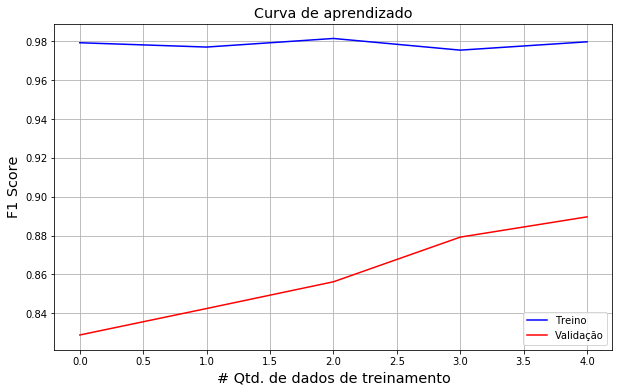

In [52]:
def curva_aprendizado_svm(X, Y, Xval, Yval):

    # inicializa as listas que guardarao a performance no treinamento e na validacao
    perf_train = []
    perf_val = []
    
    num_rows = len(X)
    
    for i in range(200,num_rows, 200):
        x_train = X[0:i,:]
        y_train = Y[0:i]
        
        custo = 3
        gamma = 0.1
        kernel = 2

        model = svm_train(y_train, x_train, '-c %f -t %d -g %f' %(custo, kernel, gamma))
        
        #train
        pred_train = svm_predict(y_train, x_train, model, options='-q')[0]             
        
        #validation
        pred_val = svm_predict(Yval, Xval, model, options='-q')[0]
            
        #scores
        #train
        cm_train = get_confusionMatrix(y_train, pred_train, [0,1])
        vp_train=cm_train[0,0] # quantidade de verdadeiros positivos
        vn_train=cm_train[1,1] # quantidade de verdadeiros negativos
        fp_train=cm_train[1,0] # quantidade de falsos positivos
        fn_train=cm_train[0,1] # quantidade de falsos negativos
        
        recall_train = vp_train/(vp_train+fn_train)
        precision_train = vp_train/(vp_train+fp_train)
    
        f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)               
        #val     
        cm_val = get_confusionMatrix(Yval, pred_val, [0,1])
        vp_val=cm_val[0,0] # quantidade de verdadeiros positivos
        vn_val=cm_val[1,1] # quantidade de verdadeiros negativos
        fp_val=cm_val[1,0] # quantidade de falsos positivos
        fn_val=cm_val[0,1] # quantidade de falsos negativos
        
        recall_val = vp_val/(vp_val+fn_val)
        precision_val = vp_val/(vp_val+fp_val)
    
        f1_val = 2 * (precision_val * recall_val) / (precision_val + recall_val)         
                
        perf_train.append(f1_train)
        perf_val.append(f1_val)
       
    # Define o tamanho da figura 
    plt.figure(figsize=(10,6))

    # Plota os dados
    plt.plot(perf_train, color='blue', linestyle='-', linewidth=1.5, label='Treino') 
    plt.plot(perf_val, color='red', linestyle='-', linewidth=1.5, label='Validação')

    # Define os nomes do eixo x e do eixo y
    plt.xlabel(r'# Qtd. de dados de treinamento',fontsize='x-large') 
    plt.ylabel(r'F1 Score',fontsize='x-large') 

    # Define o título do gráfico
    plt.title(r'Curva de aprendizado', fontsize='x-large')

    # Acrescenta um grid no gráfico
    plt.grid(axis='both')

    # Plota a legenda
    plt.legend()
    
    plt.show()

curva_aprendizado_svm(X_train_occur_scaled, Y_occur_train, X_val_occur_scaled, Y_occur_val)

Quanto maior a quantidade de dados no conjunto de treinamento, melhor o resultado no conjunto de validação, sem reducão do score no conjunto de validação.

Se utilizarmos o _dataset_ de teste com o tratamento que obteve o melhor score F1, obteremos o resultado a seguir:

In [53]:
Y_occur_test = prep_Y(Y_occur_test)

#Normalização min-max
X_test_occur_scaled = min_max_scaler(X_occur_test, X_occur_scaler).values

custo = 3
gamma = 0.1
kernel = 2

model = svm_train(Y_occur_train, X_train_occur_scaled, '-c %f -t %d -g %f' %(custo, kernel, gamma))
pred_occur = svm_predict(Y_occur_test, X_test_occur_scaled, model, options='-q')[0]

cm = get_confusionMatrix(Y_occur_test, pred_occur, [0,1])
print('Matriz de confusão:')
print(cm)

vp=cm[0,0] # quantidade de verdadeiros positivos
vn=cm[1,1] # quantidade de verdadeiros negativos
fp=cm[1,0] # quantidade de falsos positivos
fn=cm[0,1] # quantidade de falsos negativos    
recall = vp/(vp+fn)
precision = vp/(vp+fp)
    
f1 = 2 * (precision * recall) / (precision + recall)

print('Score F1: {}'.format(f1))

Matriz de confusão:
[[168  18]
 [ 20 127]]
Score F1: 0.8983957219251337


Obtivemos um _score_ parecido com o resultado do mesmo modelo no conjunto de validação, o que é um bom indicador para se evitar _overfitting_.